# **Prediction of Product Sales**

Kristina DiBella Silva

## Project Overview

## Data Dictionary

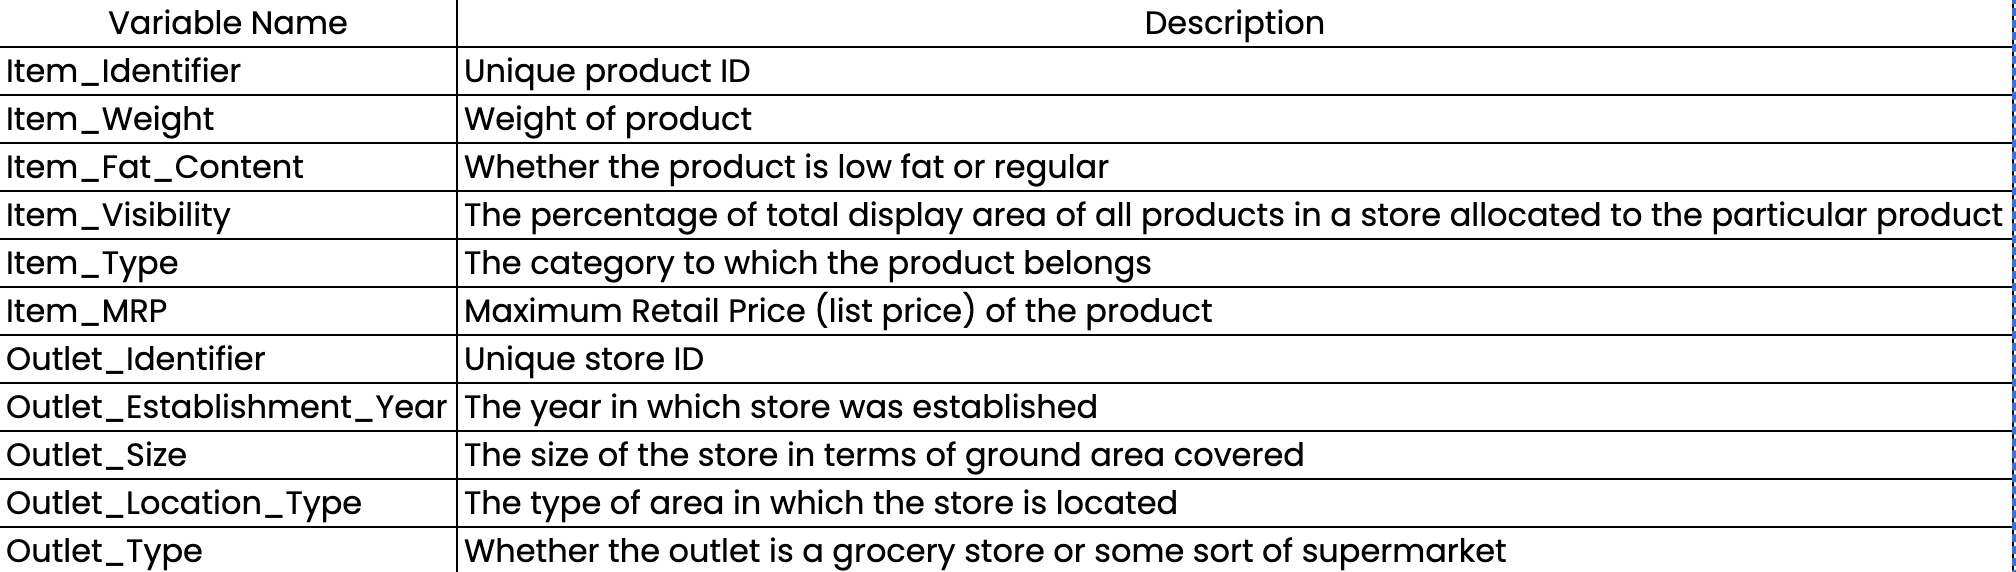

# Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


In [2]:
# CSV
filename = '../Data/sales_predictions.csv'
sp_df = pd.read_csv(filename)
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
sp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [5]:
# How many rows and columns
sp_df.shape

(8523, 12)

- There are 8523 rows and 12 columns. 

In [6]:
# Data Types
sp_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Duplicates
sp_df.duplicated().sum()

0

- No duplicates found.

4) Identify missing values.

In [8]:
sp_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 missing values in the Item_Weight column. 

- There are 2410 missing values in the Outlet_Size column.

In [9]:
sp_df.isna().sum() / len(sp_df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Item_Weight is missing 17% of the values. 
- Outlet_Size is missing 28% of the values.

**Addressing the Outlet_Size missing values**
- 28% of the data for this column is missing, I  will be replacing the values with "Unknown".

In [10]:
sp_df['Outlet_Size'].fillna('Unknown', inplace= True)

**Addressing the missing Item_Weight values**
- I am going to check the mean of Item_Weight and compare it to the median. 

In [11]:
sp_df['Item_Weight'].mean()

12.857645184135976

- Mean is 9.300

In [12]:
sp_df['Item_Weight'].median()

12.6

- Median is 9.300

- There was no outlier as mean and median returned the same value 9.300.
- I will fill the missing values of Item_Weight with 9.300 using the average.

In [13]:
mean_iwght = sp_df['Item_Weight'].mean()
sp_df['Item_Weight'].fillna(mean_iwght, inplace=True)


In [14]:
sp_df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
# confirm no more missing values
sp_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- Item_Weight and Outlet_Size are no longer missing values.

In [16]:
# Find and fix any inconsistent categories of data
sp_df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

- Item_Fat_Content has five different values, however looking at the data dictionary there should only be two, Low Fat or Regular. 
- I will need to check what the other values are in order to replace them with the correct value. 

In [17]:
sp_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- I will replace "LF" and "low fat" with "Low Fat"
- I will replace "reg" with "Regular"

In [18]:
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('LF','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('low fat','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('reg','Regular')

sp_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
# numerical columns, obtain the summary statistics of each (min, max, mean)
sp_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


## Exploratory Data Analysis

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

### Catagorical

Item Fat Content Count Plot

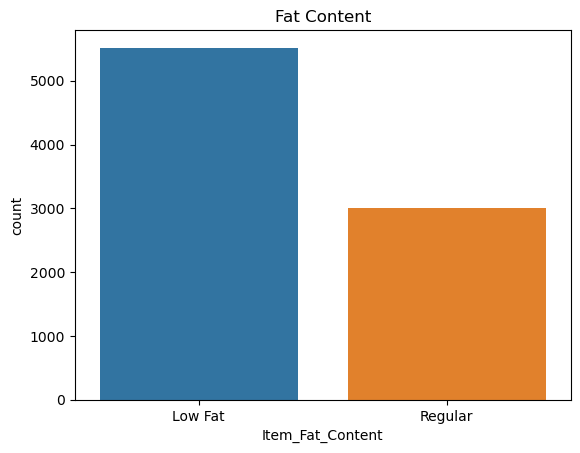

In [20]:
ax = sns.countplot(data = sp_df, x= 'Item_Fat_Content')
ax.set_title('Fat Content');

- There are more Low Fat items than regular.

Item Type Count Plot

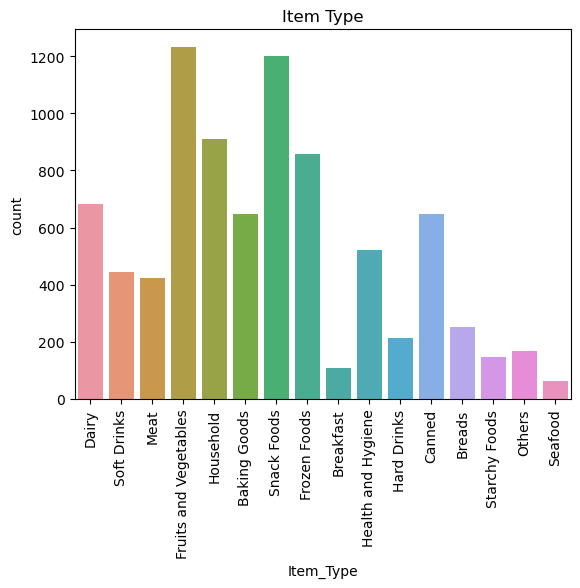

In [21]:
ax = sns.countplot(data = sp_df, x= 'Item_Type')
ax.set_title('Item Type')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

- This bar chart shows that the highest amount of items are within the Fruits and Vegatables, secondly being Snack Food type and thirdly being Household items.

Outlet Identifier Count Plot

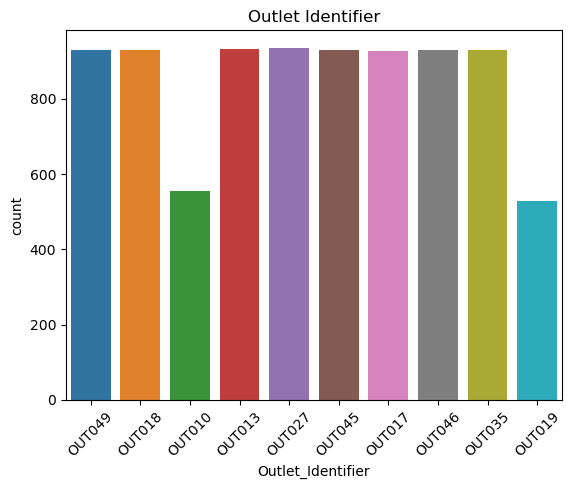

In [22]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Identifier')
ax.set_title('Outlet Identifier')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

- OUT010 and OUT019 have the least amount of enteries. 

Outlet Size Count Plot

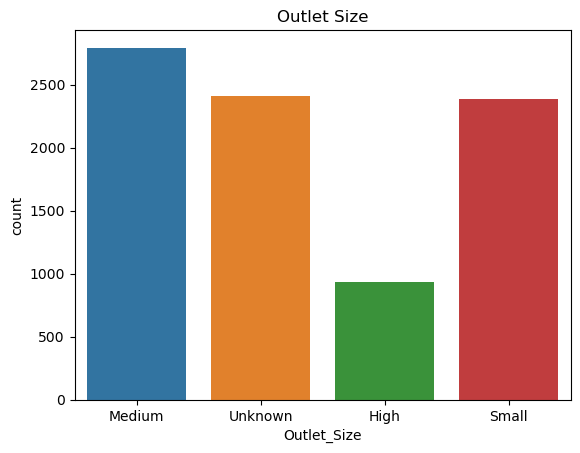

In [23]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Size')
ax.set_title('Outlet Size');

- The High Outlet size has the least values and the Medium Outlet size has the highest. 

Outlet Location Count Plot

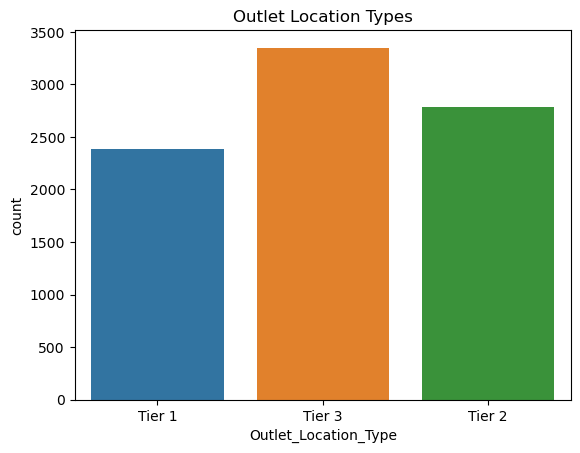

In [24]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Location_Type')
ax.set_title('Outlet Location Types');

- Tier 3 of location type has the highest count. 

Outlet Type Count Plot

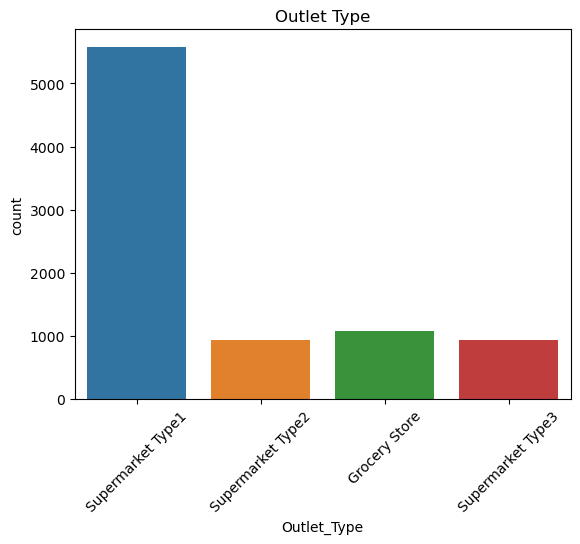

In [25]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Type')
ax.set_title('Outlet Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

- Supermarket Type1 outstandingly carries the greater count of items. 

### Numerical

Item Weight Histogram and Box Plot.

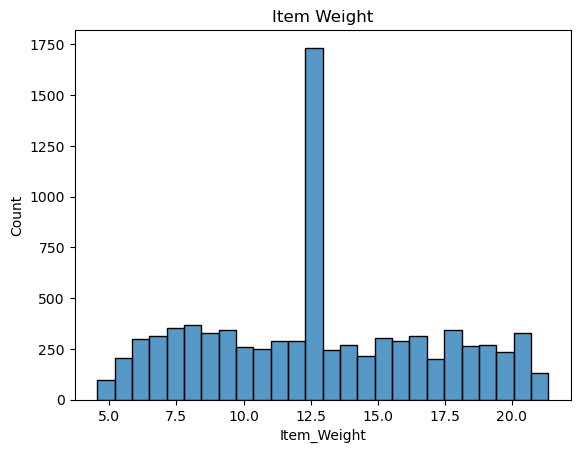

In [26]:
ax = sns.histplot(data= sp_df, x= 'Item_Weight')

ax.set_title('Item Weight');

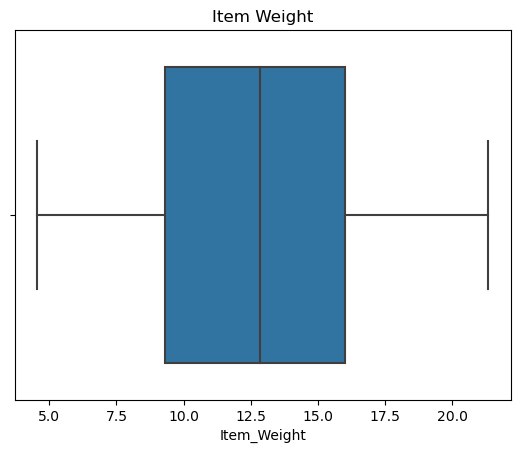

In [27]:
ax = sns.boxplot(x = 'Item_Weight', data = sp_df)
ax.set_title('Item Weight');

- There is a greater amount of items with the weight of 12.5.

Item Visibility Histogram and Box Plot.

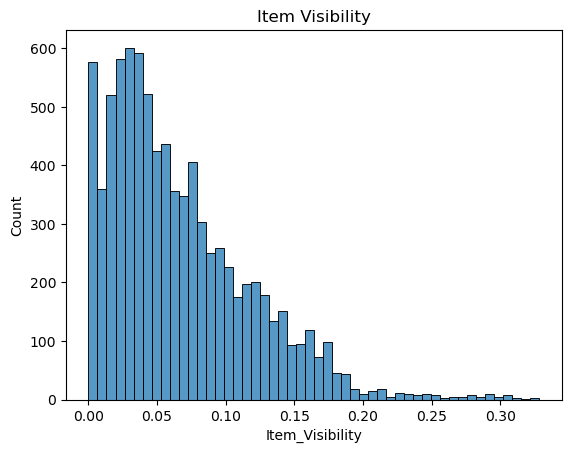

In [28]:
ax = sns.histplot(data= sp_df, x= 'Item_Visibility')

ax.set_title('Item Visibility');

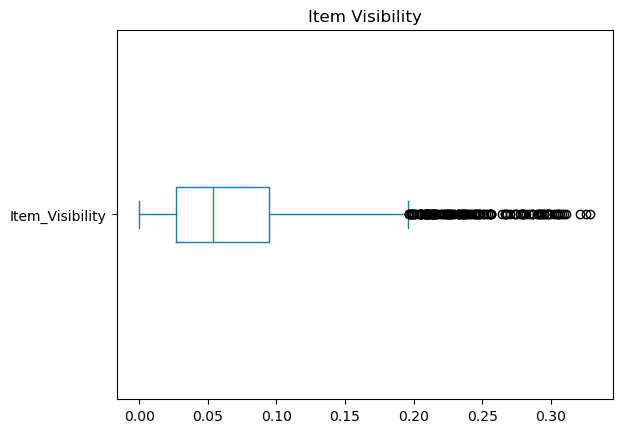

In [29]:
ax = sp_df['Item_Visibility'].plot(kind = 'box', vert= False)
ax.set_title('Item Visibility');

- The visibility of items are greatly skewed to the right. 

Item MRP Histogram and Box Plot.

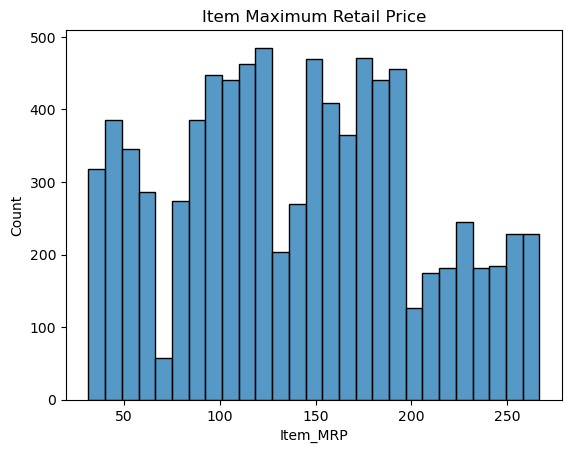

In [30]:
ax = sns.histplot(data= sp_df, x= 'Item_MRP')

ax.set_title('Item Maximum Retail Price');

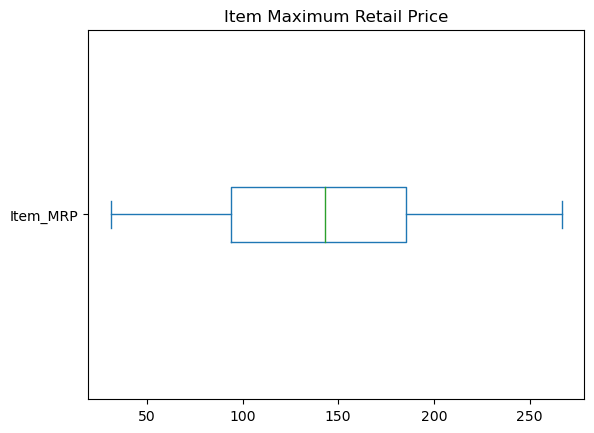

In [31]:
ax = sp_df['Item_MRP'].plot(kind = 'box', vert= False)
ax.set_title('Item Maximum Retail Price');

Outlet Establishment Year Histogram and Box Plot.

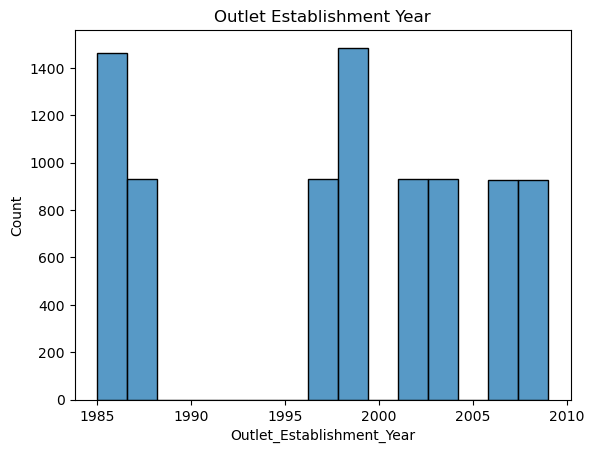

In [32]:
ax = sns.histplot(data= sp_df, x= 'Outlet_Establishment_Year')

ax.set_title('Outlet Establishment Year');

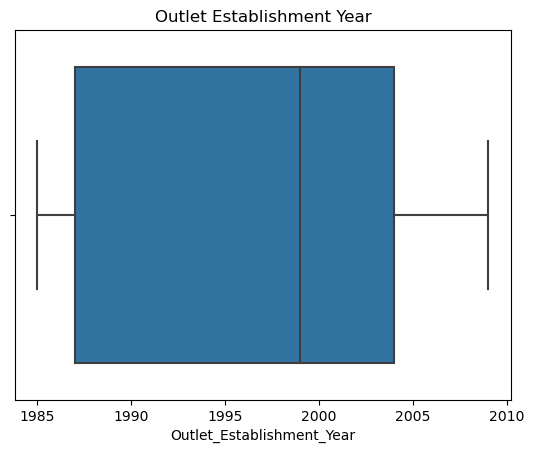

In [33]:
ax = sns.boxplot(x = 'Outlet_Establishment_Year', data = sp_df)
ax.set_title('Outlet Establishment Year');

- Most Outlets were established around 1986 and 1998.

Item Outlet Sales Histogram and Box Plot.

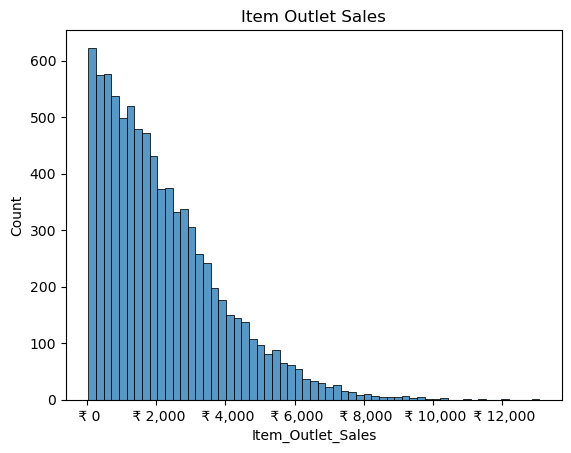

In [34]:
price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)
ax = sns.histplot(data= sp_df, x= 'Item_Outlet_Sales')
ax.set_title('Item Outlet Sales')

price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt);

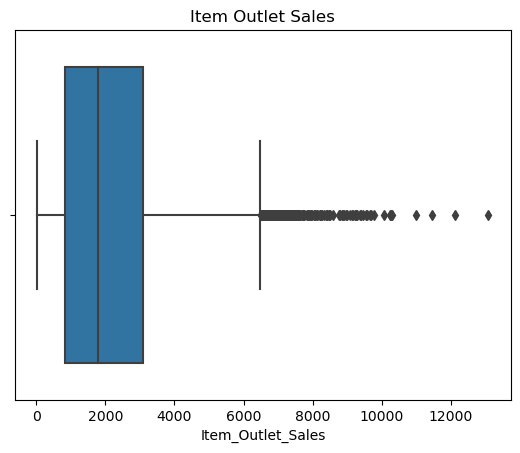

In [35]:
ax = sns.boxplot(x = 'Item_Outlet_Sales', data = sp_df)
ax.set_title('Item Outlet Sales');

- Item Outlet Sales is greatly skewed to the right. 

- Heatmap of the correlation between features.

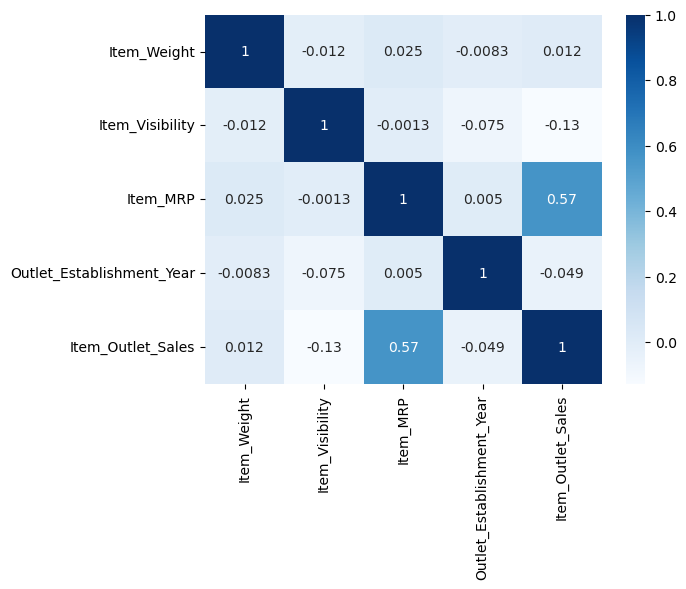

In [36]:
corr = sp_df.corr()
sns.heatmap(corr, cmap = 'Blues', annot= True);

This heat map shows us that the strongest correlation is with Item Outle Sales and Item MRP.

## Explanatory Data Analysis

In [37]:
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


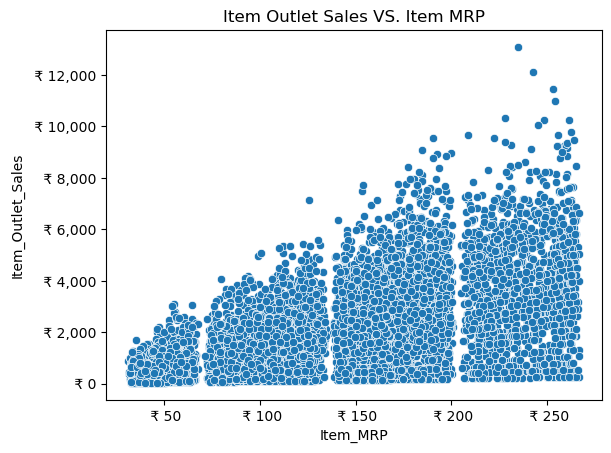

In [38]:
ax = sns.scatterplot(data = sp_df, x = 'Item_MRP', y = 'Item_Outlet_Sales')
ax.set_title('Item Outlet Sales VS. Item MRP')

price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)

ax.xaxis.set_major_formatter(price_fmt)
ax.yaxis.set_major_formatter(price_fmt)

This scatter plot shows a moderate correlation between Item Outlet Sales and Item MRP.

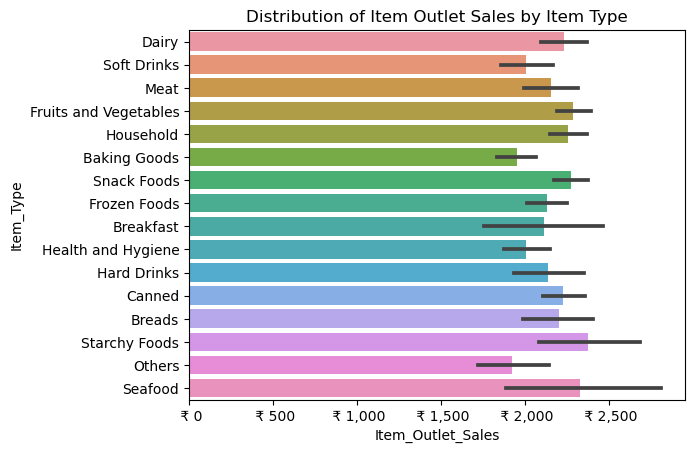

In [39]:
ax = sns.barplot(data = sp_df, x = 'Item_Outlet_Sales', y = 'Item_Type');
ax.set_title('Distribution of Item Outlet Sales by Item Type');

price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)

Which item type has the highest item outlet sales?

- This bar plot shows us that Seafood item's have the highest sales. Secondly, is going to be Starchy item's. We see this by the error bar show us the max item outlet sales.

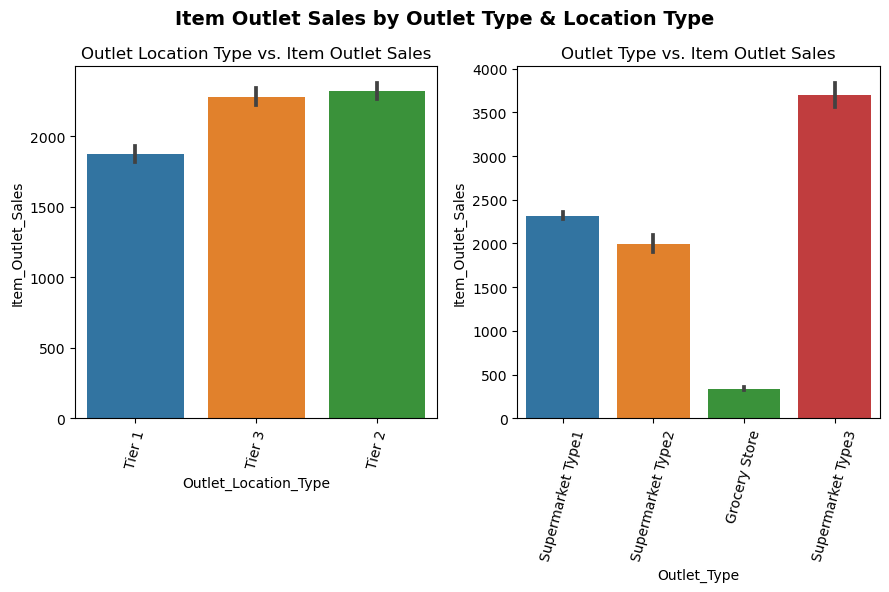

In [40]:
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))

price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)

sns.barplot(data = sp_df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', ax = axes[0])
ax.yaxis.set_major_formatter(price_fmt)

axes[0].set_title('Outlet Location Type vs. Item Outlet Sales', fontsize = 12, fontweight = 'normal')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)


sns.barplot(data = sp_df, x = 'Outlet_Type', y = 'Item_Outlet_Sales', ax = axes[1])
ax.yaxis.set_major_formatter(price_fmt)

axes[1].set_title('Outlet Type vs. Item Outlet Sales', fontsize = 12, fontweight = 'normal')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75)

fig.suptitle('Item Outlet Sales by Outlet Type & Location Type', fontsize = 14, fontweight = 'bold', y = .98)
fig.tight_layout();



Do Locations and Outlet types play a factor is producing high Item Outlet Sales?

- Tier 2 location type is highest is Item Outlet sales, but Tier 3 is a close second.
- As for Outlet Type, we see that the Supermarket Type 3 has the hightest in Item Outlet Sales when compared to the other Supermarket Types. The lowest being Grocery Store Outlet Type.

# Processing Data for Machine Learning

In [41]:
# imports
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [42]:
# CSV
filename = '../Data/sales_predictions.csv'
sp_df = pd.read_csv(filename)
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
sp_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Drop duplicates and fix inconsistencies in categorical data.

In [45]:
sp_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [46]:
#Duplicates
print(f'There are {sp_df.duplicated().sum()} duplicate values')

There are 0 duplicate values


In [47]:
#Correcting the inconsistant catagorical data

sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('LF','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('low fat','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('reg','Regular')

sp_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

- Dropping 'Item_Identifier' as the amount of different values are not benefical for predictions and will not fit well for new data.

In [48]:
X= sp_df.drop(columns= ['Item_Identifier','Item_Outlet_Sales'])
y= sp_df['Item_Outlet_Sales']


- Perform a train test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state=42)

- Create a preprocessing object to prepare the dataset for Machine Learning

- Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [50]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [51]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [52]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [53]:
#imputer for numerical- median and catagorical- most freq
median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')
#scaler
scaler = StandardScaler()
#One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [54]:
#Numeric pipeline
num_pipe = make_pipeline(median_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [55]:
#Categorical pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [56]:
#tuples for transformers
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough',verbose_feature_names_out=False)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x142885c40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x143710ca0>)],
                  verbose_feature_names_out=False)

In [57]:
# fit preprocessor to X train only
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x142885c40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x143710ca0>)],
                  verbose_feature_names_out=False)

In [58]:
#transform for both
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [59]:
# First get column names
cols = preprocessor.get_feature_names_out()

# Transform to dataframes
X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed, 
                         columns = cols,
                         index = X_test.index)

In [60]:
X_train_processed_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00,...,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00,6818.00
mean,0.00,-0.00,-0.00,0.00,0.64,0.36,0.07,0.03,0.01,0.08,...,0.11,0.61,0.28,0.28,0.33,0.40,0.13,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,...,0.31,0.49,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.31
min,-1.96,-1.29,-1.77,-1.53,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.81,-0.76,-0.76,-1.29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.06,-0.23,0.04,0.14,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.77,0.56,0.72,0.73,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.01,5.10,2.00,1.33,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [61]:
X_test_processed_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,1705.00,1705.00,1705.00,1705.00,1705.00,1705.00,1705.00,1705.00,1705.00,1705.00,...,1705.00,1705.00,1705.00,1705.00,1705.00,1705.00,1705.00,1705.00,1705.0,1705.0
mean,-0.03,0.00,-0.07,-0.01,0.66,0.34,0.08,0.04,0.01,0.08,...,0.11,0.61,0.28,0.30,0.32,0.38,0.13,0.66,0.1,0.1
std,1.00,1.02,0.98,0.99,0.47,0.47,0.27,0.19,0.12,0.27,...,0.31,0.49,0.45,0.46,0.47,0.49,0.34,0.47,0.3,0.3
min,-1.95,-1.29,-1.75,-1.53,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
25%,-0.86,-0.76,-0.79,-1.29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
50%,-0.06,-0.25,-0.19,0.14,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,0.0
75%,0.75,0.54,0.62,0.73,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.0,0.0
max,2.01,4.76,1.99,1.33,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0


# Modeling

In [62]:
# Function for evaluating metrics

def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

## Linear Regression

In [63]:
# Instantiate model
lin = LinearRegression()

In [64]:
# Model pipeline
lin_pipe = make_pipeline(preprocessor, lin)

In [65]:
lin_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142885c40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x143710ca0>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [66]:
lin_train_pred = lin_pipe.predict(X_train)
lin_test_pred = lin_pipe.predict(X_test)

eval_regression(y_train, lin_train_pred, name='Linear Regression Train')
eval_regression(y_test, lin_test_pred, name='Linear Regression Test ')

Linear Regression Train Scores
MAE: 848.0383 
MSE: 1,304,758.6119 
RMSE: 1,142.2603 
R2: 0.5589

Linear Regression Test  Scores
MAE: 792.4810 
MSE: 1,145,257.3753 
RMSE: 1,070.1670 
R2: 0.5786



Linear Regression Test  Scores

MAE: 792.0266 

MSE: 1,143,555.2488 

RMSE: 1,069.3714 

R2: 0.5793

### Lasso


In [67]:
# Function to take the true and predicted values and print regression metrics
def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model'):
  
  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)
  
  metrics = ['train_MAE','test_MAE', 
             'train_RMSE', 'test_RMSE', 
             'train_R2', 'test_R2']
  
  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[f'{model_name}'])
  scores.loc[f'{model_name}', :] = [train_mae, test_mae,
                                          train_rmse, test_rmse,
                                          train_r2, test_r2]

  return scores

In [68]:
from sklearn.linear_model import Lasso

# Model
lasso = Lasso()
# Model pipeline
lasso_pipe = make_pipeline(preprocessor, lasso)
# Fit the model
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142885c40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x143710ca0>)],
                                   verbose_feature_names_out=False)),
                ('lasso', Lasso())])

In [69]:
lasso_scores = model_metrics(lasso_pipe, X_train=X_train, y_train=y_train, 
                          X_test=X_test, y_test=y_test, 
                           model_name='Lasso Model')

display(lasso_scores)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Lasso Model,846.8716,791.2882,1141.7271,1068.5963,0.5593,0.5799


In [70]:
## Hyperparameters for tuning
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [71]:
from IPython.core.display import clear_output


## Range of alpha values
alphas = [.0001, .001, .01, .1, 1, 10, 100, 1000]

## Dataframe to store Train and Test R2 scores
scores = pd.DataFrame(index=alphas, columns=['Train R2', 'Test R2'])
## Loop through the alpha values

for alpha in alphas:
   clear_output(wait=True)
   print(f'testing alpha of {alpha} of {alphas}')
   ## Create an instance of the model
   lasso = Lasso(alpha=alpha)
   ## Create a model pipeline
   lasso_pipe = make_pipeline(preprocessor, lasso)
   ## Fit the model
   lasso_pipe.fit(X_train, y_train)

   ## Obtain the predictions from the model
   train_pred = lasso_pipe.predict(X_train)
   test_pred = lasso_pipe.predict(X_test)

   ## Obtain the R2 scores for Train and Test
   train_r2score = r2_score(y_train, train_pred)
   test_r2score = r2_score(y_test, test_pred)

   ## Save the Train and Test R2 Score for this depth in the scores dataframe
   scores.loc[alpha, 'Train R2'] = train_r2score
   scores.loc[alpha, 'Test R2'] = test_r2score

testing alpha of 1000 of [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


In [72]:
scores

,Train R2,Test R2
0.0001,0.559475,0.579266
0.0010,0.559475,0.579267
0.0100,0.559475,0.579273
0.1000,0.559473,0.579347
1.0000,0.559324,0.579871
10.0000,0.556893,0.578853
100.0000,0.493811,0.515106
1000.0000,0.0,-0.004084


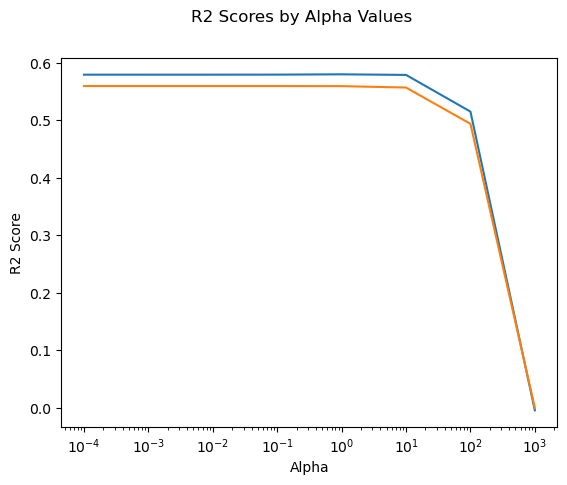

In [73]:
## Plot the scores
plt.plot(alphas, scores['Test R2'])
plt.plot(alphas, scores['Train R2'])
plt.xscale('log')
plt.suptitle('R2 Scores by Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [74]:
## Create a version on the scores dataframe
sorted_scores = scores.sort_values(by='Test R2', ascending=False)
## Display the first (5) rows of the dataframe
sorted_scores.head()

,Train R2,Test R2
1.0000,0.559324,0.579871
0.1000,0.559473,0.579347
0.0100,0.559475,0.579273
0.0010,0.559475,0.579267
0.0001,0.559475,0.579266


In [75]:
## sort the dataframe by test scores and save the index of the best score
best_alpha = sorted_scores.index[0]
## Display best_alpha
best_alpha

1.0

In [76]:
## Create an instance of the model
best_lasso = Lasso(alpha=best_alpha)
## Create a model pipeline
best_lasso_pipe = make_pipeline(preprocessor, best_lasso)
## Fit the model
best_lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142885c40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x143710ca0>)],
                                   verbose_feature_names_out=False)),
                ('lasso', Lasso())])

In [77]:
## Display model performance metrics using a function
lasso_tuned_scores = model_metrics(best_lasso_pipe, X_train=X_train, y_train=y_train, 
                          X_test=X_test, y_test=y_test, 
                           model_name='Tuned Lasso Model')


display(lasso_tuned_scores)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Tuned Lasso Model,846.8716,791.2882,1141.7271,1068.5963,0.5593,0.5799


## Regression Decision Tree

In [78]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [79]:
dec_tree.fit(X_train_processed, y_train)


DecisionTreeRegressor(random_state=42)

In [80]:
train_pred = dec_tree.predict(X_train_processed)
test_pred = dec_tree.predict(X_test_processed)


In [81]:
# evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)

print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')


Training Score: 1.0
Test Score: 0.1984037864936451


In [82]:
# Options for tuning this model
dec_tree.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [83]:
# What was the depth of our default tree
dec_tree.get_depth()


38

In [84]:
# How many leaf nodes
dec_tree.get_n_leaves()


6698

In [85]:
# Tune depth

# List of values to try for max_depth:
depths = list(range(2, 38)) 

# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score


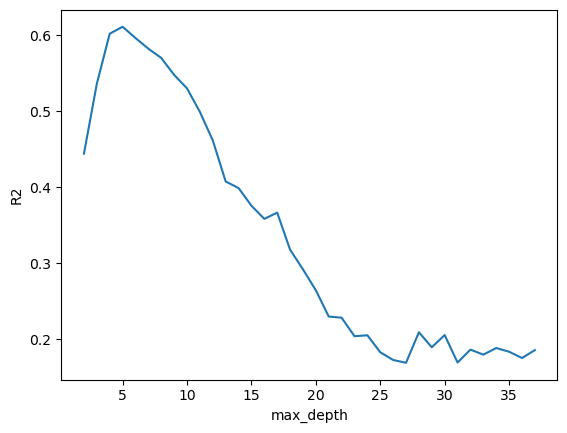

In [86]:
# Visualize which max_depth leads to the highest r2

plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');


In [87]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()


,Test Score,Train Score
5,0.61139,0.6007
4,0.602279,0.579524
6,0.596598,0.611555
7,0.582537,0.624857
8,0.570391,0.640502


In [88]:
# Run the model with our optimized value for max_depth, 5

dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)

print(f'Training Score: {train_5_score}')
print(f'Test Score: {test_5_score}')


Training Score: 0.6006999415845219
Test Score: 0.6113896069457742


In [89]:
reg_train_pred = dec_tree_5.predict(X_train_processed)
reg_test_pred = dec_tree_5.predict(X_test_processed)

eval_regression(y_train, reg_train_pred, name='Regression Tree Train')
eval_regression(y_test, reg_test_pred, name='Regression Tree Test ')

Regression Tree Train Scores
MAE: 763.0630 
MSE: 1,181,149.6320 
RMSE: 1,086.8071 
R2: 0.6007

Regression Tree Test  Scores
MAE: 721.6447 
MSE: 1,056,231.4159 
RMSE: 1,027.7312 
R2: 0.6114



## Recommended Model

The Regression Tree model performed slightly better than the Linear Regression model. Regression model has an R2 score of 61% with a mean absolute error 763.06 , where as the Linear model is at 57% with a mean absolute error 792.02, which is a averager margin of error.

# Project 1: Revisited 

In [90]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


In [91]:
#Matplotib
import matplotlib.pyplot as plt

## Preprocessing tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)

## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [92]:
df = sp_df.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [93]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

,Column,dtype,# null,null (%),nunique,min,max
0,Item_Fat_Content,object,0,0.000000,2,Low Fat,Regular
1,Item_Identifier,object,0,0.000000,1559,DRA12,NCZ54
2,Item_MRP,float64,0,0.000000,5938,31.29,266.8884
3,Item_Outlet_Sales,float64,0,0.000000,3493,33.29,13086.9648
4,Item_Type,object,0,0.000000,16,Baking Goods,Starchy Foods
5,Item_Visibility,float64,0,0.000000,7880,0.0,0.328391
6,Item_Weight,float64,1463,17.165317,415,4.555,21.35
7,Outlet_Establishment_Year,int64,0,0.000000,9,1985,2009
8,Outlet_Identifier,object,0,0.000000,10,OUT010,OUT049
9,Outlet_Location_Type,object,0,0.000000,3,Tier 1,Tier 3


In [94]:
# X & y variables
X= df.drop(columns= ['Item_Identifier','Item_Outlet_Sales'])
y= df['Item_Outlet_Sales']
# Train Test Split with random state 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= SEED)

In [95]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [96]:
## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [97]:
## make pipelines for categorical and numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='median'))

## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)

## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)

X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)

X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8077,15.25,0.061531,132.2968,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2391,17.85,0.044463,127.1020,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
163,7.27,0.071078,114.2518,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
y_test.head(2)

8077    1696.4584
2391    2024.0320
Name: Item_Outlet_Sales, dtype: float64

In [99]:
# Function to R2 Score for predications

def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

## LinearRegression

In [100]:
# Linear regression model
lin_reg = LinearRegression()
# Fit to train
lin_reg.fit(X_train_df, y_train)
# Get prediction score with function
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)


Training Data:	R^2= 0.56	RMSE= 1123.83
Test Data:	R^2= 0.57	RMSE= 1142.78


In [101]:
# Get feature names in .feature_names_in_ with sklearn
lin_reg.feature_names_in_

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_MISSING', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
   

In [102]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
coeffs['intercept'] = lin_reg.intercept_
coeffs

Item_Weight                            0.592272
Item_Visibility                     -322.745146
Item_MRP                              15.628818
Outlet_Establishment_Year            -14.207822
Item_Fat_Content_Regular              40.227023
Item_Type_Baking Goods                17.736409
Item_Type_Breads                     -19.244344
Item_Type_Breakfast                  103.271323
Item_Type_Canned                       3.420411
Item_Type_Dairy                      -12.580612
Item_Type_Frozen Foods                -8.016893
Item_Type_Fruits and Vegetables       25.607525
Item_Type_Hard Drinks                 19.805518
Item_Type_Health and Hygiene         -31.282287
Item_Type_Household                  -70.703754
Item_Type_Meat                       -25.914564
Item_Type_Others                     -13.729741
Item_Type_Seafood                     87.482328
Item_Type_Snack Foods                  4.636664
Item_Type_Soft Drinks                -92.284803
Item_Type_Starchy Foods               11

In [103]:
# Adjusting the values and sorting the Coefficients
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs.sort_values()

Outlet_Type_Grocery Store           -882.68
Outlet_Identifier_OUT019            -459.11
Outlet_Identifier_OUT010            -423.57
Item_Visibility                     -322.75
Outlet_Location_Type_Tier 1         -256.08
Outlet_Size_MISSING                 -255.79
Item_Type_Soft Drinks                -92.28
Outlet_Identifier_OUT049             -88.50
Outlet_Size_Small                    -87.02
Outlet_Type_Supermarket Type2        -85.85
Outlet_Identifier_OUT018             -85.85
Item_Type_Household                  -70.70
Outlet_Size_High                     -67.26
Outlet_Identifier_OUT013             -67.26
Outlet_Identifier_OUT045             -41.17
Item_Type_Health and Hygiene         -31.28
Item_Type_Meat                       -25.91
Item_Type_Breads                     -19.24
Outlet_Establishment_Year            -14.21
Item_Type_Others                     -13.73
Item_Type_Dairy                      -12.58
Item_Type_Frozen Foods                -8.02
Item_Weight                     

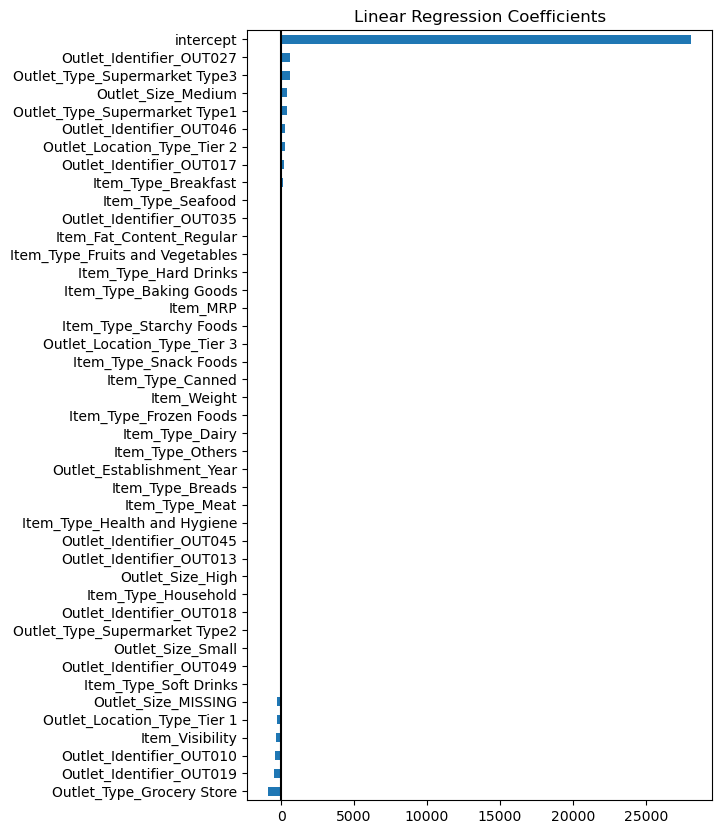

In [104]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('Linear Regression Coefficients');


In [105]:
# Calculate the ranks[.rank()] of the absolute values[.abs()] of our features and sort them
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

intercept                         43.00
Outlet_Type_Grocery Store         42.00
Outlet_Identifier_OUT027          41.00
Outlet_Type_Supermarket Type3     40.00
Outlet_Identifier_OUT019          39.00
Outlet_Identifier_OUT010          38.00
Outlet_Size_Medium                37.00
Outlet_Type_Supermarket Type1     36.00
Item_Visibility                   35.00
Outlet_Identifier_OUT046          34.00
Outlet_Location_Type_Tier 1       33.00
Outlet_Size_MISSING               32.00
Outlet_Location_Type_Tier 2       31.00
Outlet_Identifier_OUT017          30.00
Item_Type_Breakfast               29.00
Item_Type_Soft Drinks             28.00
Outlet_Identifier_OUT049          27.00
Item_Type_Seafood                 26.00
Outlet_Size_Small                 25.00
Outlet_Type_Supermarket Type2     24.00
Outlet_Identifier_OUT018          23.00
Outlet_Identifier_OUT035          22.00
Item_Type_Household               21.00
Outlet_Size_High                  20.00
Outlet_Identifier_OUT013          19.00


In [106]:
# Top 3 features
top_n_features = coeff_rank.head(3)
# View
top_n_features

intercept                   43.00
Outlet_Type_Grocery Store   42.00
Outlet_Identifier_OUT027    41.00
dtype: float64

In [107]:
## Slicing out the top_n_features names to visualize
plot_vals = coeffs.loc[top_n_features.index]
plot_vals


intercept                   28,090.04
Outlet_Type_Grocery Store     -882.68
Outlet_Identifier_OUT027       584.42
dtype: float64

In [108]:
# Amount of features
top_n = 3
# Rank for absolute values, sorted
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
# Top features ranked with feature names(.index)
top_n_features = coeff_rank.head(top_n).index
# Feature values/coefficients to plot sorted by rank
plot_vals = coeffs.loc[top_n_features].sort_values()
# View values to be ploted
plot_vals


Outlet_Type_Grocery Store     -882.68
Outlet_Identifier_OUT027       584.42
intercept                   28,090.04
dtype: float64

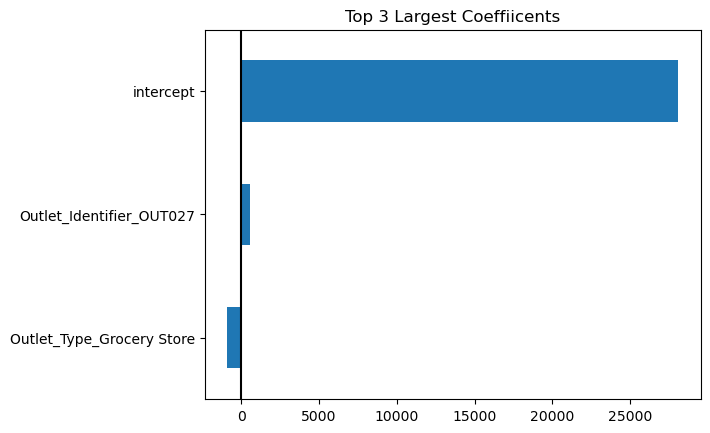

In [109]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');



In [110]:
# Function for annotating the bars on the plot 

def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)


In [111]:
# Function for plotting coefficients(with out the intercept)

def plot_coeffs(coeffs, top_n=None, figsize=(6,8), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax


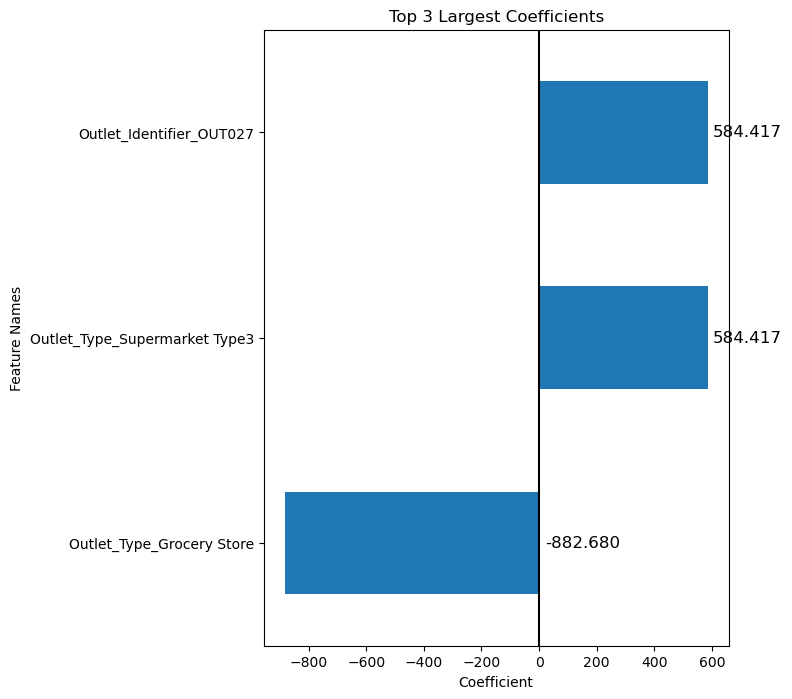

In [112]:
# Plot the top 3 features 
plot_coeffs(coeffs, top_n=3, annotate=True);

For this Linear Regression model these top 3 coefficients tell us that changes to these features will change the target by those amounts.

## Random Forest 

In [113]:
# Function to get the important features from the model with feature names

def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [114]:
# Function to plot the important features

def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

Training Data:	R^2= 0.94	RMSE= 424.74
Test Data:	R^2= 0.57	RMSE= 1140.98


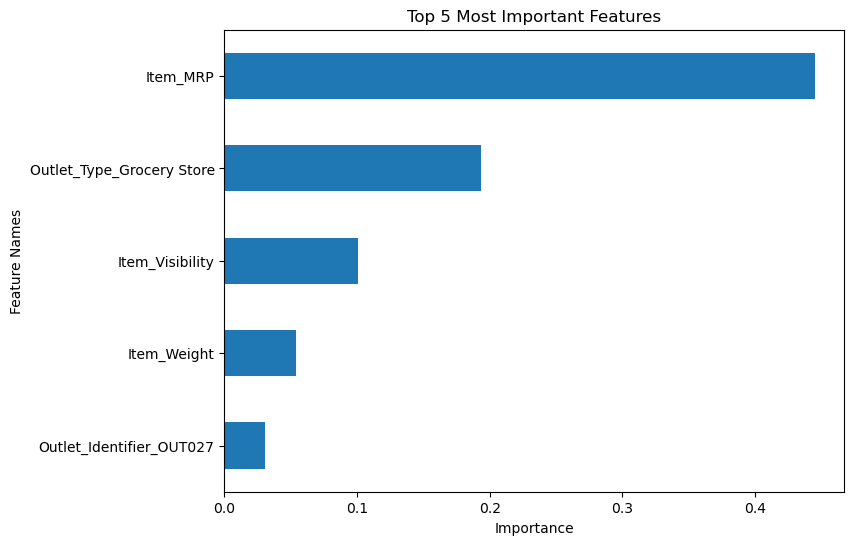

In [115]:
# Model
reg = RandomForestRegressor(random_state= SEED)
# Fit Model to train DF
reg.fit(X_train_df,y_train)
# Call Fuction to evaluate scores for train and test
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)

# Saving the feature importances with function
importances = get_importances(reg)
# Plot faeture importance with function
plot_importance(importances, top_n=5);

In [116]:
reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 321,
 'verbose': 0,
 'warm_start': False}

In [117]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'n_estimators': [80, 90, 100],
              'max_depth':[5,10, 15, 20]}

In [118]:
#Instantiate GridSearchCV
grid_search = GridSearchCV(reg, param_grid, n_jobs = -1, verbose = 1)

In [119]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train_df, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=321), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [80, 90, 100]},
             verbose=1)

In [120]:
# Obtain the best combination directly
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [121]:
# Now define the best version of the model with refit included
best_reg = grid_search.best_estimator_

Training Data:	R^2= 0.61	RMSE= 1062.36
Test Data:	R^2= 0.60	RMSE= 1092.03


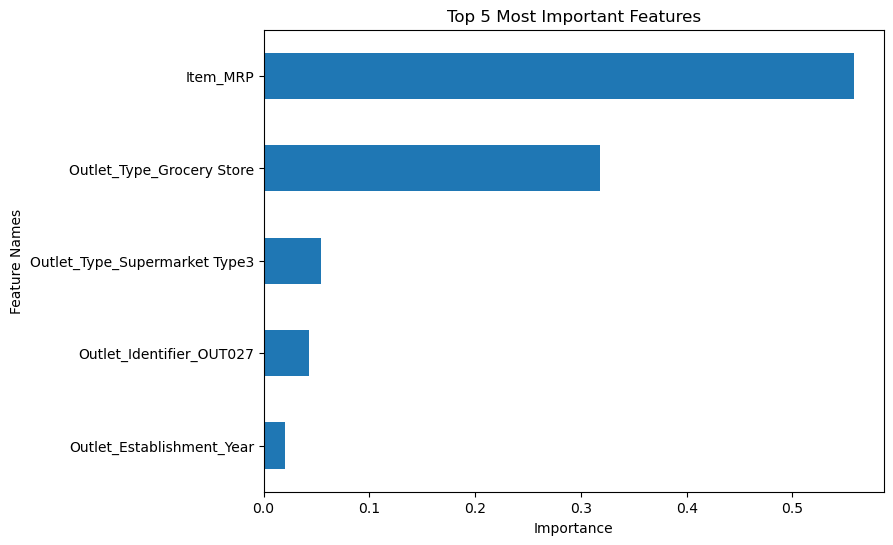

In [122]:
# Call Fuction to evaluate scores for train and test
evaluate_regression(best_reg, X_train_df, y_train, X_test_df,y_test)

# Saving the feature importances with function
importances = get_importances(best_reg)
# Plot faeture importance with function
plot_importance(importances, top_n=5);

In [123]:
## View the feature importances
importances

Item_Weight                       0.00
Item_Visibility                   0.00
Item_MRP                          0.56
Outlet_Establishment_Year         0.02
Item_Fat_Content_Regular          0.00
Item_Type_Baking Goods            0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Item_Type_Canned                  0.00
Item_Type_Dairy                   0.00
Item_Type_Frozen Foods            0.00
Item_Type_Fruits and Vegetables   0.00
Item_Type_Hard Drinks             0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Household               0.00
Item_Type_Meat                    0.00
Item_Type_Others                  0.00
Item_Type_Seafood                 0.00
Item_Type_Snack Foods             0.00
Item_Type_Soft Drinks             0.00
Item_Type_Starchy Foods           0.00
Outlet_Identifier_OUT010          0.00
Outlet_Identifier_OUT013          0.00
Outlet_Identifier_OUT017          0.00
Outlet_Identifier_OUT018          0.00
Outlet_Identifier_OUT019 

In [124]:
importances.sum()

1.0

In [125]:
## Checking the number of feature importances matches the # of columns
print(len(importances))
print(len(X_train_df.columns))
len(best_reg.feature_importances_) == len(X_train_df.columns)


42
42


True

 This Random Forest Model deemed these features as the 5 most use to best determine our target. 
 
- Item_MRP                           
- Outlet_Type_Grocery Store          
- Outlet_Type_Supermarket Type 3                     
- Outlet_Identifier_OUT027
- Outlet_Establishment_Year

## Save Best Models with Joblib

In [126]:
# dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForest':best_reg,
         'LinearRegression':lin_reg}
joblib.dump(export, 'best_models_project_one.joblib')


['best_models_project_one.joblib']

In [127]:
X_train_df.shape

(6818, 42)

In [128]:
y_train.shape

(6818,)

In [129]:
X_test_df.shape

(1705, 42)

In [130]:
y_test.shape

(1705,)

In [131]:
import sys
sys.getsizeof(X_train_df)

2345408

In [132]:
import sys
sys.getsizeof(X_test_df)

586536